<a href="https://colab.research.google.com/github/nokados/alternate/blob/main/Alternate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternate MVP

*Carpe diem. Memento mori*

Здесь должно быть описание что это такое, зачем все это и как этим пользоваться

TODO:
- Отрисовка квадратиков жизни
- Создание проектов (без подпроектов)
- Создание их стохастических функций времени (сумма синусоид, ШИМ со случайной длиной волны, ШИМ с затуханием, )
- 1 стратегия для комбинирования - колесо фортуны по приоритету
- Отрисовка финального графика, подсчет статистики для 1 симуляции
- В конце ноутбука обратная связь через Google Forms, мои контакты и донаты

## Сколько осталось жить?

Рисуем график с вероятностью остаться в живых в каждый следующий день. Вертикальной чертой на графике отмечена средняя дата смерти.

*Сейчас для простоты в качестве метода оценки смертности берется смертность в России в 2018, без разделения по полу. Данные из https://platform.who.int/mortality/themes/theme-details/MDB/all-causes
TODO: 1) полноценно проанализировать полный датасет, сделать более точную оценку с выборкой по стране и полу и другими параметрами. 2) сделать возможность варьировать личную оценку смертности*

In [148]:
from collections.abc import Callable
from datetime import datetime, timedelta


import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ipywidgets import interactive
from numpy.polynomial import Polynomial
from scipy.stats import gamma, lognorm, rv_continuous
from scipy.optimize import minimize

(-3.3018750000000026 * x ** 2 + 23.80875000000001 * x + -3.706875000000009) / 134.4. 
Q = [ -967.73433426 -1529.30918331 -1100.44312964 ...  -316.00481582
 -1669.15861129 -1216.79783255]
alpha, beta =  [3.30435864+0.97827276j 2.79798966+2.01172997j 3.27652377+1.06779941j ...
 3.40754733+0.51422252j 2.95021988+1.78101271j 3.24868146+1.14972709j] [3.30435864-0.97827276j 2.79798966-2.01172997j 3.27652377-1.06779941j ...
 3.40754733-0.51422252j 2.95021988-1.78101271j 3.24868146-1.14972709j]
[[ 6.60871728+4.44089210e-16j  5.59597932+4.44089210e-16j
   6.55304755+2.22044605e-16j ...  6.81509466+1.11022302e-16j
   5.90043976+2.22044605e-16j  6.49736293-2.22044605e-16j]
 [-4.99877677+5.47140470e-16j -6.28240819+1.62547932e-16j
  -5.12600661+2.73570235e-16j ... -4.29820687+3.29081386e-16j
  -6.03502439-1.11022302e-16j -5.24006719-2.73570235e-16j]
 [-1.60994051-9.91229679e-16j  0.68642887-6.06637142e-16j
  -1.42704094-4.95614840e-16j ... -2.5168878 -4.40103689e-16j
   0.13458463-1.11022302e-16j 

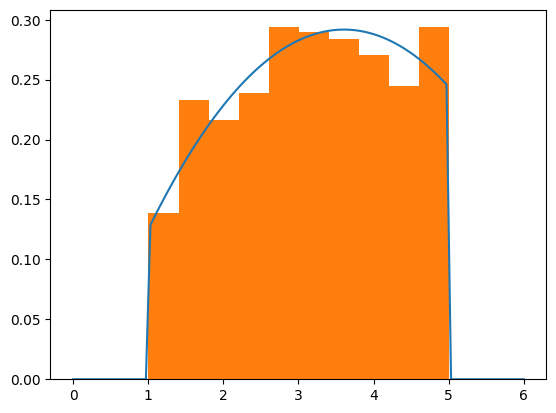

[1.99539737 4.29176674 2.17829694 ... 1.08845008 3.7399225  2.34804214]
--------------------
(0.29190000000000016 * x ** 2 + -5.027000000000003 * x + 44.147500000000015) / 255.00000000000006. 
Q = [507931.47200078 588983.76824014 465248.96297982 ... 458553.60114057
 472462.12944105 468936.00982187]
alpha, beta =  [9.7806264 +0.j 7.40387068+0.j 9.14913452+0.j ... 8.70352932+0.j
 9.30878306+0.j 8.34597468+0.j] [ -7.88247527+0.j -10.41287038+0.j  -8.42653975+0.j ...  -8.85796358+0.j
  -8.28202196+0.j  -9.23745262+0.j]
[[ 1.89815114 +0.j         -3.00899969 +0.j
   0.72259477 +0.j         ... -0.15443426 +0.j
   1.02676111 +0.j         -0.89147793 +0.j        ]
 [-0.94907557+15.29669475j  1.50449985+15.42975037j
  -0.36129739+15.22098041j ...  0.07721713+15.20869898j
  -0.51338055+15.23408402j  0.44573897+15.22769473j]
 [-0.94907557-15.29669475j  1.50449985-15.42975037j
  -0.36129739-15.22098041j ...  0.07721713-15.20869898j
  -0.51338055-15.23408402j  0.44573897-15.22769473j]]
[10.5089767

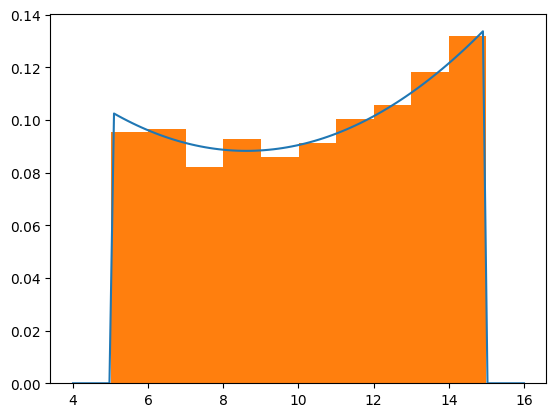

[10.50897676  5.60182593  9.3334204  ...  8.45639137  9.63758673
  7.71934769]
--------------------
(0.29490000000000055 * x ** 2 + -9.029000000000021 * x + 174.8625000000002) / 1147.0. 
Q = [73578325.85963008 49040075.04281037 49388945.07351304 ...
 49564240.39730646 62969169.36546855 47939210.28231602]
alpha, beta =  [23.99672702+0.j 20.57749885+0.j 20.67463971+0.j ... 20.7215322 +0.j
 22.92014984+0.j 20.22619632+0.j] [-14.94381472+0.j -17.42693051+0.j -17.34504918+0.j ... -17.30579762+0.j
 -15.64573727+0.j -17.72961346+0.j]
[[ 9.0529123  +0.j          3.15056833 +0.j
   3.32959052 +0.j         ...  3.41573459 +0.j
   7.27441257 +0.j          2.49658285 +0.j        ]
 [-4.52645615+33.72349839j -1.57528417+32.91280128j
  -1.66479526+32.92601642j ... -1.70786729+32.93263366j
  -3.63720629+33.39903796j -1.24829143+32.87069549j]
 [-4.52645615-33.72349839j -1.57528417-32.91280128j
  -1.66479526-32.92601642j ... -1.70786729-32.93263366j
  -3.63720629-33.39903796j -1.24829143-32.87069549j]]

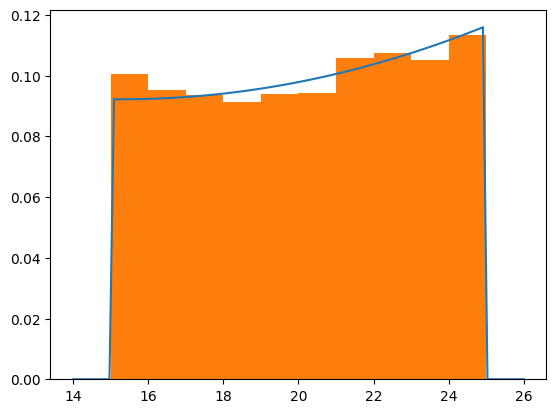

[24.36149148 18.45914751 18.6381697  ... 18.72431377 22.58299175
 17.80516203]
--------------------
(1.246199999999998 * x ** 2 + -66.86799999999991 * x + 1176.274999999999) / 3021.999999999998. 
Q = [11347035.47716333 11406785.63430179 16184621.0149567  ...
 17360821.1631813  11258773.97716657 16371565.6085628 ]
alpha, beta =  [14.52761077+0.j 14.40405232+0.j 18.41343745+0.j ... 18.79324883+0.j
 15.05486941+0.j 18.47700068+0.j] [-15.42628688+0.j -15.55861409+0.j -12.1708449 +0.j ... -11.92487225+0.j
 -14.88602028+0.j -12.12897565+0.j]
[[-0.89867611 +0.j         -1.15456177 +0.j
   6.24259255 +0.j         ...  6.86837658 +0.j
   0.16884913 +0.j          6.34802504 +0.j        ]
 [ 0.44933805+25.9408363j   0.57728089+25.94843028j
  -3.12129627+26.48676548j ... -3.43418829+26.60267321j
  -0.08442456+25.92957108j -3.17401252+26.50555301j]
 [ 0.44933805-25.9408363j   0.57728089-25.94843028j
  -3.12129627-26.48676548j ... -3.43418829-26.60267321j
  -0.08442456-25.92957108j -3.17401252-26.50

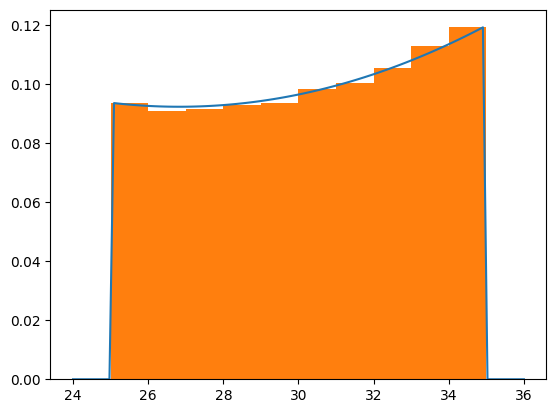

[25.93008332 25.67419766 33.07135198 ... 33.69713601 26.99760856
 33.17678446]
--------------------
(1.1852250000000006 * x ** 2 + -92.73975000000006 * x + 2638.8006250000017) / 18102.000000000007. 
Q = [3.37215311e+08 3.42832198e+08 3.83450079e+08 ... 3.37545193e+08
 4.97858170e+08 6.57920728e+08]
alpha, beta =  [26.0853105 +0.j 27.57343691+0.j 29.77955008+0.j ... 26.7833835 +0.j
 32.71131356+0.j 35.18776176+0.j] [-26.67337065+0.j -25.23382043+0.j -23.36446164+0.j ... -25.97816499+0.j
 -21.27041319+0.j -19.7734417 +0.j]
[[-0.58806015 +0.j          2.33961648 +0.j
   6.41508843 +0.j         ...  0.80521851 +0.j
  11.44090037 +0.j         15.41432006 +0.j        ]
 [ 0.29403008+45.69035815j -1.16980824+45.73242636j
  -3.20754422+46.02406421j ... -0.40260926+45.69284134j
  -5.72045018+46.74954671j -7.70716003+47.59779841j]
 [ 0.29403008-45.69035815j -1.16980824-45.73242636j
  -3.20754422-46.02406421j ... -0.40260926-45.69284134j
  -5.72045018-46.74954671j -7.70716003-47.59779841j]]
[38.5

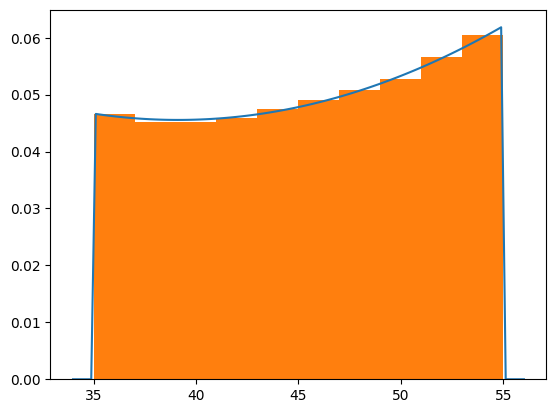

[38.53520758 41.46288422 45.53835617 ... 39.92848625 50.5641681
 54.53758779]
--------------------
(4.206300000000053 * x ** 2 + -496.9450000000067 * x + 17477.89750000021) / 61766.0. 
Q = [5.61142941e+08 3.08794717e+08 5.82983986e+08 ... 4.00346787e+08
 3.69060778e+08 3.64663827e+08]
alpha, beta =  [34.19978181+0.j 24.0235188 +0.j 34.51404196+0.j ... 31.16535528+0.j
 30.29854398+0.j 30.1620418 +0.j] [-19.46585242+0.j -27.71150685+0.j -19.28861031+0.j ... -21.36115246+0.j
 -21.97227385+0.j -22.07171219+0.j]
[[14.73392938 +0.j         -3.68798805 +0.j
  15.22543166 +0.j         ...  9.80420282 +0.j
   8.32627012 +0.j          8.09032962 +0.j        ]
 [-7.36696469+46.47580255j  1.84399402+44.80384647j
  -7.61271583+46.59446366j ... -4.90210141+45.48929007j
  -4.16313506+45.26785612j -4.04516481+45.23575789j]
 [-7.36696469-46.47580255j  1.84399402-44.80384647j
  -7.61271583-46.59446366j ... -4.90210141-45.48929007j
  -4.16313506-45.26785612j -4.04516481-45.23575789j]]
[73.80544116 55.383

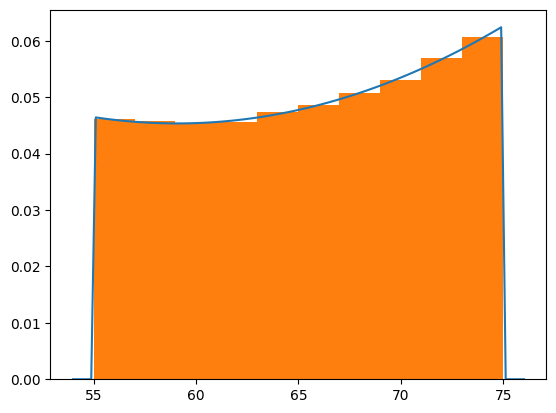

[73.80544116 55.38352373 74.29694344 ... 68.8757146  67.3977819
 67.1618414 ]
--------------------


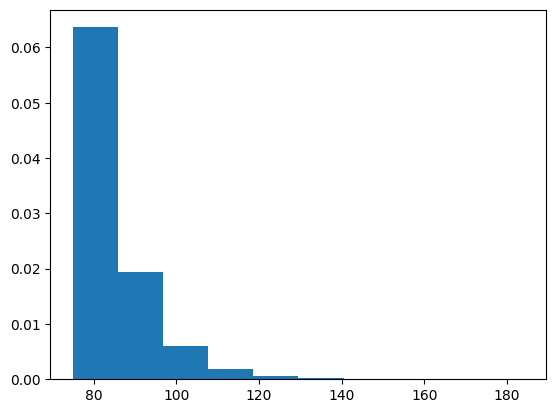

[82.00913765 83.52240158 91.5190618  ... 96.62426909 75.02962552
 75.41152338]
--------------------
(-2.810625000000001 * x ** 2 + 20.066250000000007 * x + -3.355625000000006) / 111.20000000000002. 
Q = [-1518.08809552 -1396.60710715 -1265.92829497 ... -1431.52331726
 -1519.53824015 -1262.41719894]
alpha, beta =  [3.00897947+1.57955291j 2.7517966 +1.99413147j 2.66613823+2.10728541j ...
 3.08344291+1.42874934j 2.87484585+1.81223789j 3.15927341+1.25217266j] [3.00897947-1.57955291j 2.7517966 -1.99413147j 2.66613823-2.10728541j ...
 3.08344291-1.42874934j 2.87484585-1.81223789j 3.15927341-1.25217266j]
[[ 6.01795895+2.22044605e-16j  5.50359321-2.22044605e-16j
   5.33227647+0.00000000e+00j ...  6.16688582+4.44089210e-16j
   5.74969171+2.22044605e-16j  6.31854683-2.22044605e-16j]
 [-5.74484536-1.11022302e-16j -6.20573363+4.95614840e-16j
  -6.31606363-3.84592537e-16j ... -5.55810936+1.62547932e-16j
  -6.01373396+2.73570235e-16j -5.32810008+1.11022302e-16j]
 [-0.27311358-1.11022302e-16j  0.7021

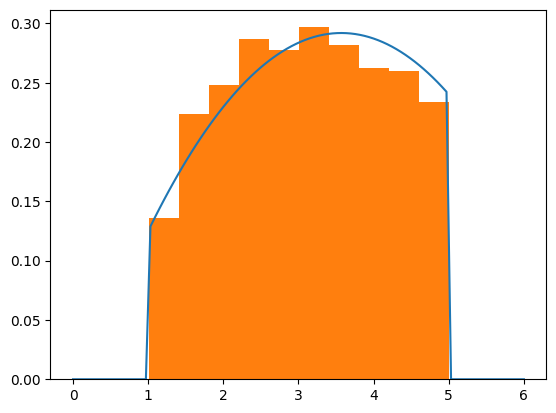

[3.29659956 4.27185356 4.5535003  ... 2.96093669 3.83375539 2.5792664 ]
--------------------
(0.11340000000000008 * x ** 2 + -2.1080000000000005 * x + 25.695) / 169.0. 
Q = [2885360.4192812  2889818.81447913 3877188.82536775 ... 3466008.12023425
 3078731.65616059 3806073.35499252]
alpha, beta =  [11.02082242+0.j 12.73660783+0.j 14.46731298+0.j ... 10.06271709+0.j
 13.24387063+0.j 14.38358723+0.j] [-12.72127973+0.j -11.00755921+0.j  -9.69073974+0.j ... -13.9325158 +0.j
 -10.58595094+0.j  -9.74714879+0.j]
[[-1.7004573  +0.j          1.72904863 +0.j
   4.77657324 +0.j         ... -3.86979871 +0.j
   2.65791969 +0.j          4.63643844 +0.j        ]
 [ 0.85022865+20.5612636j  -0.86452431+20.56305185j
  -2.38828662+20.92148736j ...  1.93489936+20.78048125j
  -1.32895984+20.63723085j -2.31821922+20.8978304j ]
 [ 0.85022865-20.5612636j  -0.86452431-20.56305185j
  -2.38828662-20.92148736j ...  1.93489936-20.78048125j
  -1.32895984-20.63723085j -2.31821922-20.8978304j ]]
[ 7.59407532 11.0235812

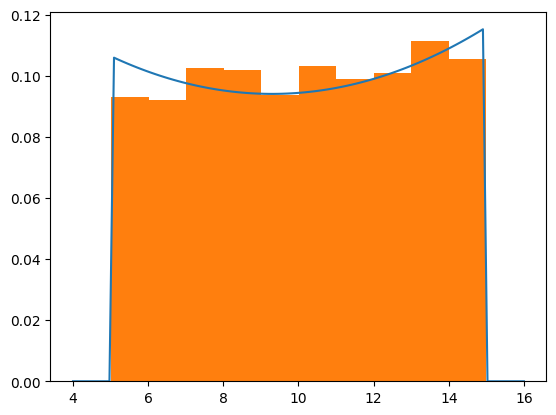

[ 7.59407532 11.02358126 14.07110587 ...  5.42473392 11.95245232
 13.93097107]
--------------------
(0.10380000000000039 * x ** 2 + -3.2680000000000136 * x + 66.77500000000012) / 438.0. 
Q = [67328252.76510893 64005695.94969337 64990695.87320942 ...
 81743014.6664657  63429505.41517118 62770896.73997282]
alpha, beta =  [21.92739686+0.j 21.15215873+0.j 21.42148618+0.j ... 23.81087448+0.j
 20.96548946+0.j 20.70413262+0.j] [-18.03678818+0.j -18.69784629+0.j -18.46276254+0.j ... -16.61004987+0.j
 -18.86432526+0.j -19.10245745+0.j]
[[ 3.89060868 +0.j          2.45431244 +0.j
   2.95872364 +0.j         ...  7.20082461 +0.j
   2.1011642  +0.j          1.60167517 +0.j        ]
 [-1.94530434+34.60999949j -1.22715622+34.51111668j
  -1.47936182+34.5407726j  ... -3.60041231+35.00554733j
  -1.0505821 +34.49363138j -0.80083759+34.47351824j]
 [-1.94530434-34.60999949j -1.22715622-34.51111668j
  -1.47936182-34.5407726j  ... -3.60041231-35.00554733j
  -1.0505821 -34.49363138j -0.80083759-34.47351824j]]

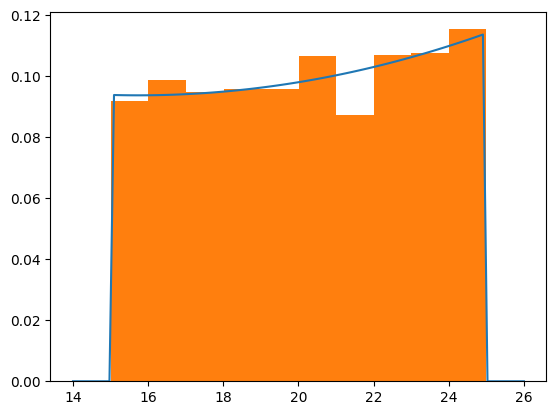

[19.63241986 18.19612362 18.70053481 ... 22.94263579 17.84297537
 17.34348635]
--------------------
(0.4643999999999995 * x ** 2 + -25.085999999999967 * x + 436.0499999999995) / 1053.0. 
Q = [14181513.54382136 10230318.49082753 15302829.71864255 ...
  9516619.12542671 13779026.26048824  9241275.83845654]
alpha, beta =  [18.17111923+0.j 16.15762024+0.j 18.55107885+0.j ... 13.59692392+0.j
 18.02272644+0.j 14.11871713+0.j] [-11.52736008+0.j -12.96385429+0.j -11.29125892+0.j ... -15.40532519+0.j
 -11.62227231+0.j -14.83598209+0.j]
[[ 6.64375915 +0.j          3.19376596 +0.j
   7.25981993 +0.j         ... -1.80840127 +0.j
   6.40045412 +0.j         -0.71726497 +0.j        ]
 [-3.32187957+25.71963754j -1.59688298+25.21993674j
  -3.62990996+25.84422261j ...  0.90420063+25.11668449j
  -3.20022706+25.67332201j  0.35863248+25.07550508j]
 [-3.32187957-25.71963754j -1.59688298-25.21993674j
  -3.62990996-25.84422261j ...  0.90420063-25.11668449j
  -3.20022706-25.67332201j  0.35863248-25.07550508j]]

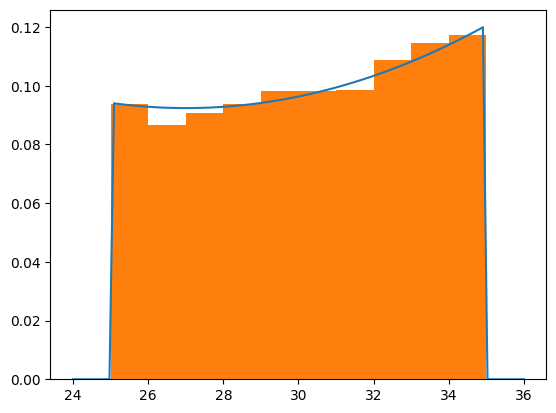

[33.65280307 30.20280988 34.26886385 ... 25.20064266 33.40949805
 26.29177896]
--------------------
(0.5356500000000002 * x ** 2 + -42.47450000000003 * x + 1130.406250000001) / 6432.000000000004. 
Q = [1.85397812e+08 2.62258961e+08 3.24602039e+08 ... 1.84360698e+08
 2.69718480e+08 1.57024001e+08]
alpha, beta =  [26.6984639 +0.j 29.81322234+0.j 31.41326687+0.j ... 26.63529311+0.j
 30.03083654+0.j 22.60981147+0.j] [-20.1663583 +0.j -18.05946311+0.j -17.13959873+0.j ... -20.21418675+0.j
 -17.92859777+0.j -23.8131481 +0.j]
[[ 6.5321056  +0.j         11.75375923 +0.j
  14.27366815 +0.j         ...  6.42110636 +0.j
  12.10223877 +0.j         -1.20333663 +0.j        ]
 [-3.2660528 +40.58612657j -5.87687961+41.45896174j
  -7.13683407+42.04801504j ... -3.21055318+40.57283971j
  -6.05111938+41.53408846j  0.60166832+40.2034623j ]
 [-3.2660528 -40.58612657j -5.87687961-41.45896174j
  -7.13683407-42.04801504j ... -3.21055318-40.57283971j
  -6.05111938-41.53408846j  0.60166832-40.2034623j ]]
[46.179

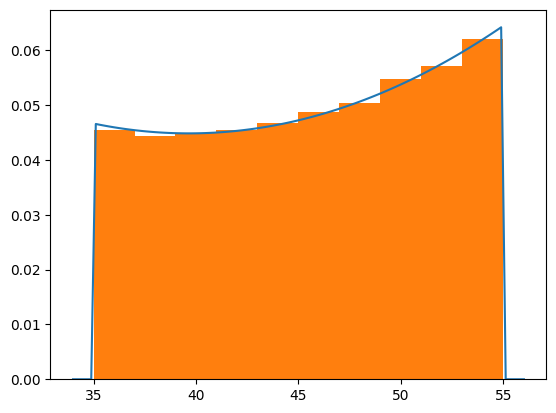

[46.17972998 51.40138361 53.92129253 ... 46.06873074 51.74986315
 38.44428775]
--------------------
(4.870125000000053 * x ** 2 + -591.3437500000068 * x + 18950.828125000215) / 25042.0. 
Q = [10806468.30551017  8781421.39637012 41036209.14599382 ...
 26129374.21991775 18090023.8613566   8978651.18230659]
alpha, beta =  [16.81184615+0.j 13.78232188+0.j 22.95502996+0.j ... 21.02270496+0.j
 19.41976381+0.j 13.45131566+0.j] [-12.2159274 +0.j -14.90113885+0.j  -8.94672289+0.j ...  -9.76907074+0.j
 -10.57542687+0.j -15.26782192+0.j]
[[ 4.59591875 +0.j         -1.11881696 +0.j
  14.00830707 +0.j         ... 11.25363422 +0.j
   8.84433694 +0.j         -1.81650626 +0.j        ]
 [-2.29795938+25.13878931j  0.55940848+24.84060566j
  -7.00415354+27.62772839j ... -5.62681711+26.66645999j
  -4.42216847+25.97659712j  0.90825313+24.87150271j]
 [-2.29795938-25.13878931j  0.55940848-24.84060566j
  -7.00415354-27.62772839j ... -5.62681711-26.66645999j
  -4.42216847-25.97659712j  0.90825313-24.87150271j]]

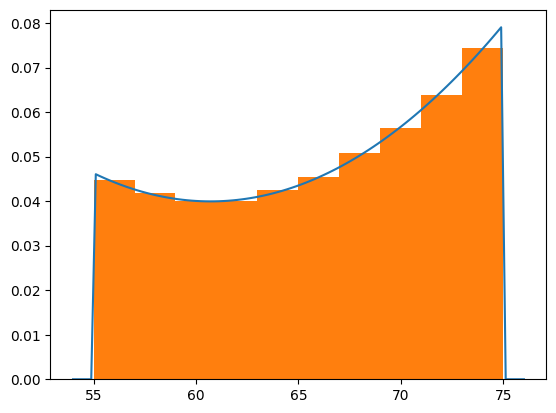

[65.30727113 59.59253542 74.71965945 ... 71.9649866  69.55568931
 58.89484612]
--------------------


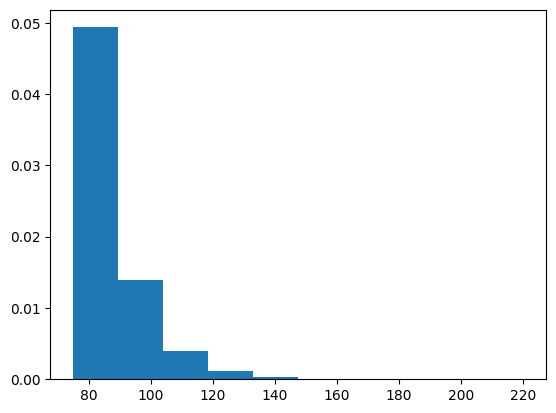

[87.00898113 83.04192498 82.87467059 ... 91.2128903  78.00410562
 75.60986313]
--------------------


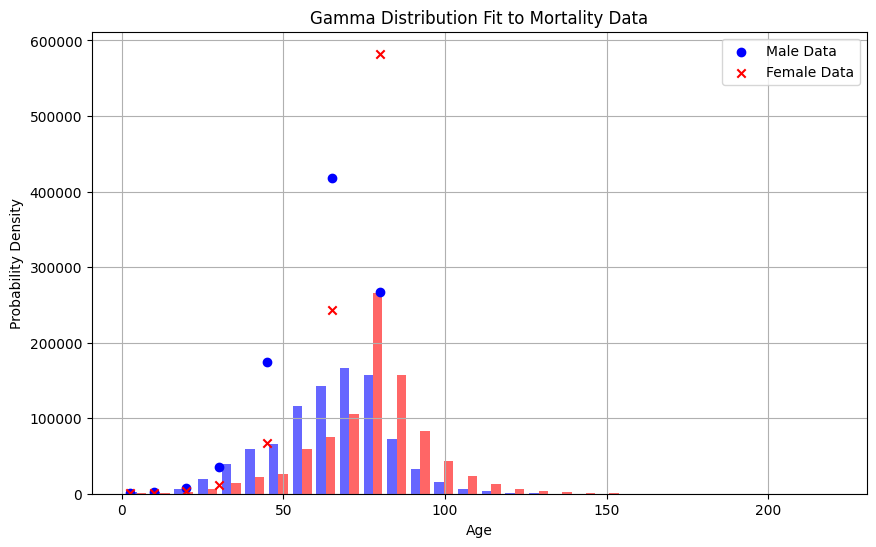

In [135]:
from operator import le
import numpy as np
import matplotlib.pyplot as plt

# Данные смертности по возрастным категориям в России в 2018
# https://platform.who.int/mortality/themes/theme-details/MDB/all-causes
age_groups = ['1-4', '5-14', '15-24', '25-34', '35-54', '55-74', '75+']
ages = np.array([2.5, 10, 20, 30, 45, 65, 80])  # Средний возраст в каждой группе
age_count = [5, 10, 10, 10, 20, 20, 120-75]
male_deaths = np.array([1321, 2167, 8139, 35556, 174758, 417619, 266474])
female_deaths = np.array([1031, 1370, 2976, 12184, 67316, 243860, 582448])

male_deaths_per_100k = [33.6, 25.5, 114.7, 302.2, 905.1, 3088.3, 10879.9]
female_deaths_per_100k = [27.8, 16.9, 43.8, 105.3, 321.6, 1252.1, 8676.1]


# https://rosinfostat.ru/smertnost/
male_mean = 67.75
female_mean = 77.82


class ParabolaDistribution(rv_continuous):
    def __init__(self, x_left, x_right, y_left, y_right, mean, *args, **kwargs):
        super().__init__(a=x_left, b=x_right, *args, **kwargs)
        self.x_left = x_left
        self.x_right = x_right

        # Решаем систему уравнений для нахождения коэффициентов параболы a*x^2 + b*x + c
        A = np.array([
            [x_left**2, x_left, 1],
            [x_right**2, x_right, 1],
            [(x_right**3 - x_left**3) / 3, (x_right**2 - x_left**2) / 2, x_right - x_left]
        ])
        b = np.array([y_left, y_right, mean * (x_right - x_left)])
        self.a_coeff, self.b_coeff, self.c_coeff = np.linalg.solve(A, b)

        # Вычисляем интеграл параболической функции на заданном интервале
        self.integral = self._compute_integral(x_left, x_right)

        self._ppf_calc = self._cordano_presolve()

        print(
            f"({self.a_coeff} * x ** 2 + {self.b_coeff} * x "
            f"+ {self.c_coeff}) / {self.integral}. "
        )

    def _parabola(self, x):
        return self.a_coeff * x**2 + self.b_coeff * x + self.c_coeff

    def _compute_integral(self, x_left, x_right):
        return (self.a_coeff / 3 * (x_right**3 - x_left**3) +
                self.b_coeff / 2 * (x_right**2 - x_left**2) +
                self.c_coeff * (x_right - x_left))

    def _pdf(self, x):
        # Возвращаем плотность только для значений внутри заданного интервала
        mask = (x >= self.x_left) & (x <= self.x_right)
        pdf_values = np.zeros_like(x, dtype=float)
        pdf_values[mask] = self._parabola(x[mask]) / self.integral
        return pdf_values

    def _cdf(self, x):
        # Векторизованное вычисление CDF
        cdf_values = np.zeros_like(x, dtype=float)
        below = x < self.x_left
        above = x > self.x_right
        within = (x >= self.x_left) & (x <= self.x_right)

        cdf_values[below] = 0
        cdf_values[above] = 1
        cdf_values[within] = self._compute_integral(self.x_left, x[within]) / self.integral

        return cdf_values

    def _compute_cdf(self, x):
        return self._compute_integral(self.x_left, x) / self.integral

    def _ppf(self, q):
        # Метод инверсного преобразования для ускорения генерации случайных чисел
        q = np.asarray(q)
        ppf_values = np.zeros_like(q, dtype=float)

        within = (q > 0) & (q < 1)

        ppf_values[within] = self._ppf_calc(q[within])
        ppf_values[q <= 0] = self.x_left
        ppf_values[q >= 1] = self.x_right

        if np.isnan(ppf_values).any():
            raise ValueError("NaN in PPF calculation")

        return ppf_values

    def _cordano_presolve(self):
        a = self.a_coeff / 3
        b = self.b_coeff / 2
        c = self.c_coeff

        I = self.integral
        C = self._compute_integral(0, self.x_left)

        p = (3 * a * c - b ** 2) / (3 * a ** 2)
        q_raw = (2 * b ** 3 - 9 * a * b * c) / (27 * a ** 3) - C / a

        def q(quantile):
            return q_raw - (I / a) * quantile

        Q_raw = (p / 3) ** 3

        def Q(quantile):
            res = Q_raw + 0.25 * q(quantile) ** 2
            print(f"Q = {res}")
            return res

        def alpha_beta(quantile):
            halfq = -q(quantile) / 2
            Q_disc = Q(quantile) + 0j
            sqrtQ = np.sqrt(Q_disc)

            alpha = (halfq + sqrtQ) ** (1 / 3)
            beta = -p / (3 * alpha)
            return alpha, beta, Q_disc

        loc = b / (3 * a)

        def ppf_calc(quantile):
            alpha, beta, Q_disc = alpha_beta(quantile)
            print("alpha, beta = ", alpha, beta)
            y = alpha + beta

            real = - y / 2
            imag = np.sqrt(3) * (alpha - beta) / 2
            y2 = real + 1j * imag
            y3 = real - 1j * imag  # conjugate
            y_vars = np.vstack((y, y2, y3))
            print(y_vars)
            mask = (
                np.isclose(y_vars.imag, 0)
                & (y_vars.real >= self.x_left + loc)
                & (y_vars.real <= self.x_right + loc)
            )
            indices = np.argmax(mask, axis=0)
            y_real = y_vars[indices, np.arange(y_vars.shape[1])].real

            x = y_real - loc
            print(x)
            return x

        return ppf_calc


def generate_data_for_age(
        age_group: str,
        n_deaths: int,
        n_deaths_mean: float,
        n_deaths_left: float,
        n_deaths_right: float
    ):
    """Сгенерируем искусственные данные о возрасте смерти.

    Каждый отрезок будем симулировать экспоненциальным распределением
    со средним числом смертей взятым из кол-во смертей на 100к населения.
    И отрежем часть, которая выше right_bound
    """
    try:
        left_bound, right_bound = map(int, age_group.split("-"))
        right_bound += 1
    except ValueError:
        # make truncated exponential
        left_bound = 75
        right_bound = 120

        rvs = np.zeros(n_deaths)
        too_old = np.ones_like(rvs, dtype=bool)

        while too_old.any():
            rvs[too_old] = left_bound + np.random.exponential(
                scale=100000 / n_deaths_mean,
                size=too_old.sum()
            )
            too_old = rvs > right_bound
            break  # disable truncate

        plt.hist(rvs, density=True)
        plt.show()
        return rvs

    parabola_dist = ParabolaDistribution(
        x_left=left_bound,
        x_right=right_bound,
        y_left=n_deaths_left,
        y_right=n_deaths_right,
        mean=n_deaths_mean,
        name='parabola'
    )

    x = np.linspace(left_bound - 1, right_bound + 1, 100)
    plt.plot(x, parabola_dist.pdf(x))
    # plt.plot(x, parabola_dist.cdf(x))
    rvs = parabola_dist.rvs(size=n_deaths)
    plt.hist(rvs, density=True)
    plt.show()

    return rvs


def generate_data(deaths, deaths_per_100k):
    data = []
    previous_death = 0
    for (i, age_group), n_deaths, n_deaths_mean  in zip(
        enumerate(age_groups), deaths, deaths_per_100k
    ):
        prev_part = 0.1
        n_deaths_left = (
            deaths_per_100k[i - 1] * prev_part + n_deaths_mean * (1 - prev_part)
            if i > 0
            else n_deaths_mean / 2
        )
        n_deaths_right = (
            deaths_per_100k[i + 1] * prev_part + n_deaths_mean * (1 - prev_part)
            if i < len(age_groups) - 1
            else 0
        )

        data.append(
            generate_data_for_age(
                age_group, n_deaths, n_deaths_mean, n_deaths_left, n_deaths_right
                )
        )
        print(data[-1])
        print("-" * 20)
    return np.hstack(data)

male_data = generate_data(male_deaths, male_deaths_per_100k)
female_data = generate_data(female_deaths, female_deaths_per_100k)

plt.figure(figsize=(10, 6))

plt.hist(
    [male_data, female_data],
    bins=30,
    color=['blue', 'red'],
    alpha=0.6,
)

plt.scatter(ages, male_deaths, color='blue', marker='o', label='Male Data')
plt.scatter(ages, female_deaths, color='red', marker='x', label='Female Data')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Gamma Distribution Fit to Mortality Data')
plt.legend()
plt.grid()
plt.show()

In [136]:
np.mean(male_data), np.mean(female_data)

(65.1551341340237, 76.84166820270516)

In [127]:
# Использование метода fit для подбора параметров гамма-распределения
alpha_male, loc_male, scale_male = gamma.fit(male_data)
alpha_female, loc_female, scale_female = gamma.fit(female_data)

# Параметры гамма-распределения
beta_male = 1/scale_male
beta_female = 1/scale_female

# Результаты
print(f"Male: alpha = {alpha_male}, beta = {beta_male}, loc = {loc_male}, scale = {scale_male}")
print(f"Female: alpha = {alpha_female}, beta = {beta_female}, loc = {loc_female}, scale = {scale_female}")

print("Male mean, var, skew, kurt = ", gamma.stats(alpha_male, loc=loc_male, scale=scale_male, moments='mvsk'))
print("Female mean, var, skew, kurt = ", gamma.stats(alpha_female, loc=loc_female, scale=scale_female, moments='mvsk'))

Male: alpha = 403.687546946491, beta = 1.1396313159973892, loc = -288.810278741233, scale = 0.8774767646015538
Female: alpha = 458.9632194747944, beta = 1.2260405446092133, loc = -297.16545027733264, scale = 0.8156337116230841
Male mean, var, skew, kurt =  (65.4161638633118, 310.8254727929539, 0.09954221937537631, 0.014862980157263318)
Female mean, var, skew, kurt =  (77.18042392137409, 305.3291148034793, 0.09335574606173717, 0.013072942984115335)


In [137]:
from scipy.stats import weibull_min
# Использование метода fit для подбора параметров гамма-распределения
c_male, loc_male, scale_male = weibull_min.fit(male_data, floc=0)
c_female, loc_female, scale_female = weibull_min.fit(female_data, floc=0)

# Результаты
print(f"Male: c = {c_male}, loc = {loc_male}, scale = {scale_male}")
print(f"Female: c = {c_female}, loc = {loc_female}, scale = {scale_female}")

print("Male mean, var, skew, kurt = ", weibull_min.stats(c_male, loc=loc_male, scale=scale_male, moments='mvsk'))
print("Female mean, var, skew, kurt = ", weibull_min.stats(c_female, loc=loc_female, scale=scale_female, moments='mvsk'))

Male: c = 4.1325532036976895, loc = 0, scale = 71.5675563406982
Female: c = 4.6569765140100605, loc = 0, scale = 83.52032015496353
Male mean, var, skew, kurt =  (64.98994303816805, 313.37878809097265, -0.11318011809836033, -0.23793986002584866)
Female mean, var, skew, kurt =  (76.37035445514888, 348.34615067346715, -0.20360793506510044, -0.17009485693225646)


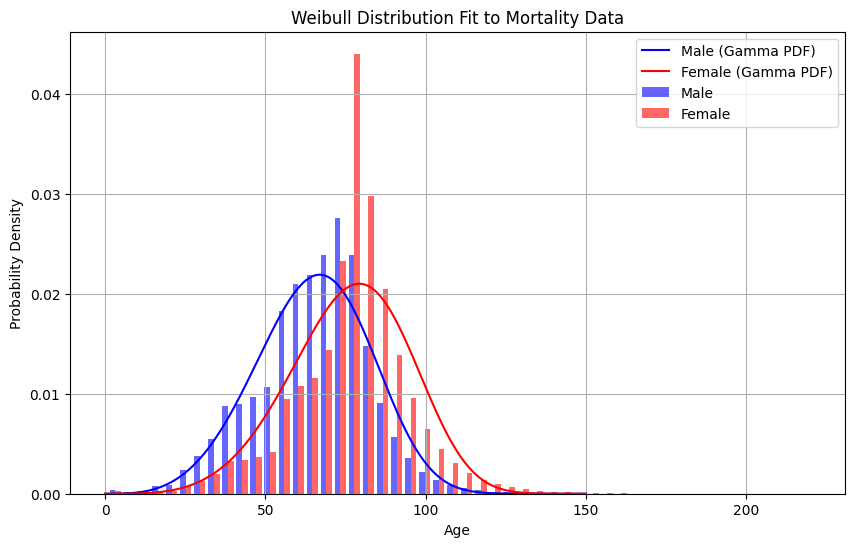

In [139]:
# Визуализация результатов
x = np.linspace(0, 150, 1000)

# pdf_male = gamma.pdf(x, alpha_male, loc=loc_male, scale=scale_male)
# pdf_female = gamma.pdf(x, alpha_female, loc=loc_female, scale=scale_female)

pdf_male = weibull_min.pdf(x, c_male, loc=loc_male, scale=scale_male)
pdf_female = weibull_min.pdf(x, c_female, loc=loc_female, scale=scale_female)

# pdf_male = gumbel_l.pdf(x, loc=loc_male, scale=scale_male)
# pdf_female = gumbel_l.pdf(x, loc=loc_female, scale=scale_female)



plt.figure(figsize=(10, 6))
plt.plot(x, pdf_male, label='Male (Gamma PDF)', color='blue')
plt.plot(x, pdf_female, label='Female (Gamma PDF)', color='red')
plt.hist(
    [male_data, female_data],
    bins=50,
    density=True,
    color=['blue', 'red'],
    label=['Male', 'Female'],
    alpha=0.6,
)
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Weibull Distribution Fit to Mortality Data')
plt.legend()
plt.grid()
plt.show()


In [146]:
# @markdown ### Введите дату рождения:
birth_date = '1980-01-01' # @param {type:"date"}
birth_date = datetime.fromisoformat(birth_date)
current_date = datetime.now()

# Функция, которую будем отрисовывать
def plot_function(c, **kwargs):
    x = np.linspace(0, 150, 400)
    y = weibull_min.pdf(x, c, **kwargs)

    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    plt.grid(True)
    plt.show()

# Создаем интерактивные слайдеры для изменения параметров
interactive_plot = interactive(
    plot_function,
    # L=widgets.FloatSlider(value=1, min=0, max=10, step=0.1),
    # k=widgets.SelectionSlider(
    #     options= [2 ** i for i in range(-6, 2)],
    #     value=0.125
    # ),
    # t0=widgets.FloatSlider(value=50, min=0, max=100, step=1)
    c=widgets.FloatSlider(value=4.1325, min=1, max=20, step=0.1),
    loc=widgets.FloatSlider(value=male_mean - np.mean(male_data), min=0, max=50, step=0.5),
    scale=widgets.FloatSlider(value=71.5675563406982, min=0, max=300, step=0.5)
)

# Отображаем интерактивный график
interactive_plot

interactive(children=(FloatSlider(value=4.1325, description='c', max=20.0, min=1.0), FloatSlider(value=2.59486…